In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Print training and testing data shape

In [ ]:
#add your code to print the shapes of your input data and your target
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


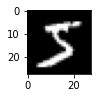

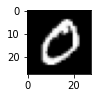

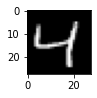

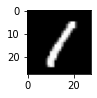

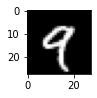

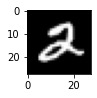

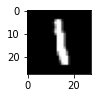

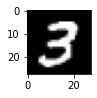

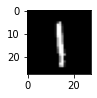

In [ ]:
#plotting
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
#add your code to reshape your input to 1D 
train_X=np.reshape(train_X, newshape=(train_X.shape[0],-1))
train_X.shape
test_X=np.reshape(test_X, newshape=(test_X.shape[0],-1))
test_X.shape

(10000, 784)

In [ ]:
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, stratify=train_y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
y_val = to_categorical(y_val)
test_y = to_categorical(test_y)

In [ ]:
weights = []
bias = []
layers_config = [784, 512, 10]
average_weights = []
average_bias = []
eta = 0.01
epoch_accuracy = []

In [ ]:
def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivative(values):
    result = [1 if x > 0 else 0 for x in values]
    return result

def tanh_activation(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - (np.tanh(x) ** 2)

def Softmax(x):
    return np.exp(x - np.max(x))/(np.sum(np.exp(x - np.max(x))))

In [ ]:
def feedforward(input_image):
    a = []
    a.append(input_image.reshape(len(input_image),1))
    for i in range(1, len(layers_config)-1):
        a.append(ReLU((weights[i] @ a[i-1]).reshape(len(weights[i]), 1) + bias[i]))
    y_hat = Softmax((weights[-1] @ a[-1]) + bias[-1]).reshape(len(weights[-1]),)
    a.append(y_hat)
    return a

In [ ]:
def backprop(a, ground_output_y):
    delta_error = list(np.empty_like(a))
    index_count = len(layers_config) - 1
    delta_error[index_count] = (a[index_count] - ground_output_y).reshape(len(a[index_count]), 1)
    average_bias[index_count] = average_bias[index_count] + delta_error[index_count] # Output Layer
    average_weights[index_count] = average_weights[index_count] + (delta_error[index_count] @ a[index_count - 1].T) # Output Layer
    for i in range(index_count - 1, 0, -1):
        h_derivative = np.array(ReLU_derivative(a[i])).reshape(1, len(a[i])) * np.eye(len(a[i]))
        delta_error[i] = h_derivative.T @ weights[i+1].T @ delta_error[i+1]
        average_bias[i] = average_bias[i] + delta_error[i]
        average_weights[i] = average_weights[i] + (delta_error[i] @ a[i-1].T)

In [ ]:
# He Normalization
def initialize_weights():
    if len(layers_config) < 3:
        print("Incorrect network structure. Check the neural network layer configuration")
    else:
        layer_count = len(layers_config)
        weights.append([])
        bias.append([])
        average_weights.append([])
        average_bias.append([])
        for i in range(1, layer_count):
            neurons_previous = layers_config[i-1]
            neurons_current = layers_config[i]
            single_layer_weights = np.random.normal(0, np.sqrt(2/neurons_previous), (neurons_current, neurons_previous))
            single_layer_bias = np.random.normal(0, np.sqrt(2/neurons_previous), (neurons_current, 1))
            weights.append(single_layer_weights)
            bias.append(single_layer_bias)
            average_weights.append(single_layer_weights)
            average_bias.append(single_layer_bias)

In [ ]:
initialize_weights()

In [ ]:
epoch_size = 50
batch_size = 50
batch_numbers = int(len(train_X)/batch_size)

In [ ]:
#Single Sample Updates
shuffle_order = np.random.permutation(len(train_X))
for i in range(1, epoch_size + 1):
    print("Running Epoch {}".format(i))
    if i == 2:
        eta = eta/2
    if i == 3:
        eta = eta/2
    shuffle_order = np.random.permutation(len(train_X))
    for j in range(batch_numbers):
        print("Running batch number {} in epoch {}".format(j, i))
        for k in range(batch_size):
            shuffle_index = j * batch_size + k
            sample_x = train_X[shuffle_index,:]
            sample_y = train_y[shuffle_index, :]
            a_values = feedforward(sample_x)
            backprop(a_values, sample_y)
        for a in range(len(weights)):
            value_weight = weights[a]
            value_average_weight = np.multiply(average_weights[a], (eta/batch_size))
            weights[a] = np.subtract(value_weight, value_average_weight)
            value_bias = bias[a]
            value_average_bias = np.multiply(average_bias[a], (eta/batch_size))
            bias[a] = np.subtract(value_bias, value_average_bias)
    print("Running feedforward on validation data for epoch {}".format(i))
    y_output = np.array([feedforward(X_val[m, :])[len(layers_config) - 1] for m in range(len(X_val))])
    class_output = np.argmax(y_output, axis=1)
    label_class = np.argmax(y_val, axis=1)
    number_correct_classification = np.sum(class_output == label_class)
    accuracy_val = number_correct_classification / len(X_val)
    epoch_accuracy.append(accuracy_val)
    print("Accuracy on Validation Set for epoch {} is {}".format(epoch_size, accuracy_val))

Running Epoch 1
Running batch number 0 in epoch 1


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Running batch number 1 in epoch 1
Running batch number 2 in epoch 1
Running batch number 3 in epoch 1
Running batch number 4 in epoch 1
Running batch number 5 in epoch 1
Running batch number 6 in epoch 1
Running batch number 7 in epoch 1
Running batch number 8 in epoch 1
Running batch number 9 in epoch 1
Running batch number 10 in epoch 1
Running batch number 11 in epoch 1
Running batch number 12 in epoch 1
Running batch number 13 in epoch 1
Running batch number 14 in epoch 1
Running batch number 15 in epoch 1
Running batch number 16 in epoch 1
Running batch number 17 in epoch 1
Running batch number 18 in epoch 1
Running batch number 19 in epoch 1
Running batch number 20 in epoch 1
Running batch number 21 in epoch 1
Running batch number 22 in epoch 1
Running batch number 23 in epoch 1
Running batch number 24 in epoch 1
Running batch number 25 in epoch 1
Running batch number 26 in epoch 1
Running batch number 27 in epoch 1
Running batch number 28 in epoch 1
Running batch number 29 in ep

In [ ]:
plt.plot(range(1, epoch_size + 1), epoch_accuracy)
plt.title('Model accuracy after each epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axvline(x=1)
plt.show()

In [ ]:
# Training Set Accuracy
y_output = np.array([feedforward(train_X[i, :])[len(layers_config) - 1] for i in range(len(train_X))])
class_output = np.argmax(y_output, axis=1)
label_class = np.argmax(train_y, axis = 1)
number_correct_classification = np.sum(class_output == label_class)
accuracy_train = number_correct_classification/len(train_X)
print("Accuracy on Training Set is {}".format(accuracy_train))

In [ ]:
# Test Set Accuracy
y_output = np.array([feedforward(X_val[i, :])[len(layers_config) - 1] for i in range(len(test_X))])
class_output = np.argmax(y_output, axis=1)
label_class = np.argmax(test_y, axis = 1)
number_correct_classification = np.sum(class_output == label_class)
accuracy_test = number_correct_classification/len(test_X)
print("Accuracy on Test Set is {}".format(accuracy_test))